## Machine Learning Third Home Assignment
Group number: 14

#### Import libraries and dataset

In [2]:
# Import libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
# Import dataset
X_TRAIN, X_ivs, y_TRAIN, col_names = pickle.load(open("drd2_data.pickle", "rb"))

#### Functions

In [4]:
# Simplistic evaluation function running Random Forest, Decision Tree and Linear Regression, and producing the RVE for each 
def naif_model_testingR(X_train, X_test, y_train, y_test):
    #test 3 approaches and print out the results
    
    rfr= RandomForestRegressor(n_estimators=10)
    rfr.fit(X_train, y_train)

    dtr= DecisionTreeRegressor(max_depth=5)
    dtr.fit(X_train, y_train)

    lmr=LinearRegression()
    lmr.fit(X_train, y_train)

    rf_preds=rfr.predict(X_test)
    dt_preds=dtr.predict(X_test)
    lr_preds=lmr.predict(X_test)

    print("RVE RFs: %7.4f" % explained_variance_score(y_test, rf_preds))
    print("RVE DTs: %7.4f" % explained_variance_score(y_test, dt_preds))
    print("RVE LRs: %7.4f" % explained_variance_score(y_test, lr_preds))

In [5]:
# Runner function
def runner(scaler, modeler, X_train, y_train, X_test):
    scaler.fit(X_train)
    Xt_train = scaler.transform(X_train)
    Xt_test = scaler.transform(X_test)
    modeler.fit(Xt_train, y_train)
    return modeler.predict(Xt_test)

In [6]:
# Calculate RVE function
def calculate_rve(y_test, preds, run, model, results):
    rve = explained_variance_score(y_test, preds)
    results.append({
        'Run': str(run),
        'Scaler': str(scaler),
        'Model': str(model),
        'RVE': rve
    })

### Step 0. Pre-processing the data

#### 0.1 Examining X_TRAIN dataset

In [7]:
# Check data types
X_TRAIN.dtype

dtype('float64')

In [8]:
# Column names
print(X_TRAIN.dtype.names)

None


In [9]:
# Array shape
X_TRAIN.shape

(7337, 2132)

In [10]:
# array to data.frame
dfx = pd.DataFrame(X_TRAIN)
# Dataset basic descriptive statistics
dfx.describe()

,0,1,2,3,4,5,6,7,8,9,...,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131
count,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,...,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000
mean,430.518010,431.037078,5.430285,1.206897,6.527327,1.128799,4.678070,30.497615,59.165190,6.594930,...,0.396211,0.036800,0.031075,0.088456,0.027668,0.011040,0.018264,0.038026,0.094725,0.036800
std,181.613020,181.757699,4.160569,2.527815,5.983082,2.218665,2.789156,12.882724,25.749585,4.403703,...,0.489143,0.188283,0.173533,0.283976,0.164031,0.104497,0.133912,0.191273,0.292855,0.188283
min,135.068414,135.166000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,19.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,357.124405,357.429000,4.000000,0.000000,4.000000,0.000000,3.000000,25.000000,49.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,419.107040,419.500000,5.000000,1.000000,6.000000,1.000000,4.000000,30.000000,57.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,472.228141,472.888000,6.000000,1.000000,8.000000,1.000000,6.000000,33.000000,65.000000,8.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3768.848446,3771.262000,92.000000,47.000000,137.000000,42.000000,58.000000,266.000000,527.000000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 0.2 Examining y_TRAIN dataset

In [11]:
# Check data types
y_TRAIN.dtype

dtype('float64')

In [12]:
# Column names
print(y_TRAIN.dtype.names)

None


In [13]:
# Array shape
y_TRAIN.shape

(7337,)

In [13]:
# array to data.frame
dfy = pd.DataFrame(y_TRAIN)
# Dataset basic descriptive statistics
dfy.describe()

,0
count,7337.000000
mean,0.388388
std,0.276656
min,0.000000
25%,0.169187
50%,0.382177
75%,0.581929
max,1.000000


#### 0.3 Examining X_ivs dataset

In [14]:
# Check data types
X_ivs.dtype

dtype('float64')

In [15]:
# Column names
print(X_ivs.dtype.names)

None


In [16]:
# Array shape
X_ivs.shape

(816, 2132)

In [17]:
# array to data.frame
dfi = pd.DataFrame(X_ivs)
# Dataset basic descriptive statistics
dfi.describe()

,0,1,2,3,4,5,6,7,8,9,...,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131
count,816.000000,816.00000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.00000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,424.093046,424.60449,5.237745,1.134804,6.387255,1.050245,4.583333,30.093137,58.547794,6.383578,...,0.378676,0.035539,0.03799,0.089461,0.030637,0.013480,0.019608,0.031863,0.115196,0.039216
std,148.934984,149.07467,3.084869,1.902266,4.250966,1.697685,2.274514,10.606568,20.616395,3.471698,...,0.485355,0.185252,0.19129,0.285583,0.172439,0.115391,0.138733,0.175742,0.319454,0.194227
min,191.131014,191.27400,1.000000,0.000000,0.000000,0.000000,1.000000,14.000000,26.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,351.193555,351.77700,4.000000,0.000000,4.000000,0.000000,3.000000,25.000000,49.000000,4.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,416.657121,417.25450,5.000000,1.000000,6.000000,1.000000,4.000000,30.000000,57.000000,6.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,472.236208,472.58500,6.000000,1.000000,8.000000,1.000000,6.000000,33.000000,64.000000,8.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1635.822461,1637.00900,36.000000,20.000000,51.000000,18.000000,22.000000,118.000000,228.000000,37.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 0.4 Checking for missing values

In [17]:
print("Number of NaN in the X_TRAIN: ", np.count_nonzero(np.isnan(X_TRAIN)))
print("Number of NaN in the y_TRAIN: ", np.count_nonzero(np.isnan(y_TRAIN)))
print("Number of NaN in the X_ivs:   ", np.count_nonzero(np.isnan(X_ivs)))

Number of NaN in the X_TRAIN:  0
Number of NaN in the y_TRAIN:  0
Number of NaN in the X_ivs:    0


In [18]:
print("Number of '?' in the X_TRAIN: ", np.count_nonzero(X_TRAIN=='?'))
print("Number of '?' in the y_TRAIN: ", np.count_nonzero(y_TRAIN=='?'))
print("Number of '?' in the X_ivs:   ", np.count_nonzero(X_ivs=='?'))

Number of '?' in the X_TRAIN:  0
Number of '?' in the y_TRAIN:  0
Number of '?' in the X_ivs:    0


/var/folders/p_/kcl1g93d2lqfgmbbh785y7900000gn/T/ipykernel_40475/4278104260.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print("Number of '?' in the X_TRAIN: ", np.count_nonzero(X_TRAIN=='?'))
/var/folders/p_/kcl1g93d2lqfgmbbh785y7900000gn/T/ipykernel_40475/4278104260.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print("Number of '?' in the y_TRAIN: ", np.count_nonzero(y_TRAIN=='?'))
/var/folders/p_/kcl1g93d2lqfgmbbh785y7900000gn/T/ipykernel_40475/4278104260.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print("Number of '?' in the X_ivs:   ", np.count_nonzero(X_ivs=='?'))


## Approach 1

### Step 1. Split the data set into a training and testing set

#### 1.1 Split the data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_TRAIN, y_TRAIN, test_size = 0.25, random_state = 4)

#### 1.2 Naif model testing

In [20]:
naif_model_testingR(X_train, X_test, y_train, y_test)

RVE RFs:  0.6108
RVE DTs:  0.3091
RVE LRs:  0.4054


### Step 2. Scale the data

#### 2.1 Finding the best scaler

Note: did not use "scaler = PowerTransformer()" because it yields the error "RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)"

In [22]:
runs = range(5)
scalers = [MinMaxScaler(), StandardScaler(), Normalizer()]
models = [RandomForestRegressor(n_estimators=10), DecisionTreeRegressor(max_depth=5), LinearRegression()]
results = []

for run in runs:
    for scaler in scalers:
        for model in models:
            preds = runner(scaler, model, X_train, y_train, X_test)
            calculate_rve(y_test, preds, run, model, results)

rve_table_scalers = pd.DataFrame(results)
rve_table_scalers = rve_table_scalers.sort_values(by = 'RVE', ascending = False)
rve_table_scalers[:5]

,Run,Scaler,Model,RVE
21,2,StandardScaler(),RandomForestRegressor(n_estimators=10),0.615382
9,1,MinMaxScaler(),RandomForestRegressor(n_estimators=10),0.612799
24,2,Normalizer(),RandomForestRegressor(n_estimators=10),0.612194
12,1,StandardScaler(),RandomForestRegressor(n_estimators=10),0.608931
18,2,MinMaxScaler(),RandomForestRegressor(n_estimators=10),0.608862


Different runs yield different "best scaler". The three tested scalers perform identically, with MinMaxScaler() being the one that is more often the "best scaler". 

#### 2.2 Apply the selected scaler to data

In [21]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s = pd.DataFrame(scaler.transform(X_train))
X_test_s  = pd.DataFrame(scaler.transform(X_test))

### Step 3. Feature selection

#### 3.1 Identify the most important features and evaluate results

In [23]:
# Identify and evaluate the most important features using the SelectFromModel class
res_fs = []
rfr = RandomForestRegressor(random_state = 4)
t_range = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001]
for t in t_range:
    sel = SelectFromModel(estimator = rfr, threshold = t)
    sel.fit(X_train_s, y_train)
    X_train_s_fs = sel.transform(X_train_s)
    X_test_s_fs = sel.transform(X_test_s)
    rfr.fit(X_train_s_fs, y_train)
    rfr_preds = rfr.predict(X_test_s_fs)
    res_fs.append({'Threshold': t, 'RVE': explained_variance_score(y_test, rfr_preds)})

# Create a DataFrame from the list of results
res_fs = pd.DataFrame(res_fs)
res_fs = res_fs.sort_values(by = "RVE", ascending = False)
res_fs[:5]

,Threshold,RVE
3,1.000000e-04,0.652071
2,1.000000e-05,0.650977
0,1.000000e-07,0.649729
1,1.000000e-06,0.649729
4,1.000000e-03,0.618857


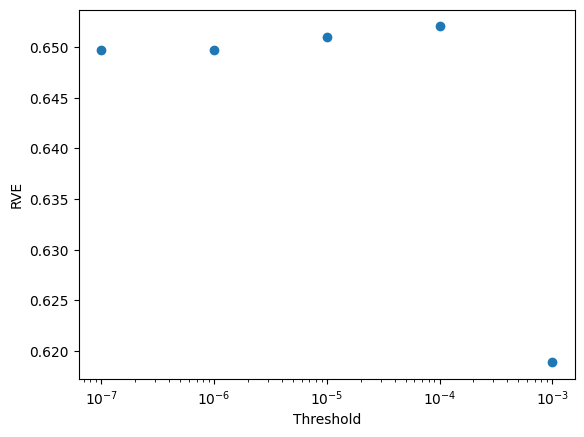

In [24]:
# Plot RVE vs Threshold
res_fs.plot(x = 'Threshold', y = 'RVE', style = 'o')
plt.xlabel('Threshold')
plt.ylabel('RVE')
plt.legend('', frameon = False)
plt.xscale("log")
plt.show()

#### 3.2 Selected features - transforming dataset by keeping the "best" set of features

In [22]:
rfr = RandomForestRegressor(random_state = 4)
N,M = X_train_s.shape
sel = SelectFromModel(estimator = rfr, threshold = 0.0001)
sel.fit(X_train_s, y_train)
features = sel.get_support()
Features_selected = np.arange(M)[features]
X_train_s_fs = sel.transform(X_train_s)
X_test_s_fs = sel.transform(X_test_s)

In [23]:
print("Number of features selected: ", len (Features_selected), "out of the initial", M, "(%4.1f"%(((len (Features_selected))/M)*100),"%)")

Number of features selected:  1306 out of the initial 2132 (61.3 %)


In [24]:
naif_model_testingR(X_train_s_fs, X_test_s_fs, y_train, y_test)

RVE RFs:  0.6135
RVE DTs:  0.3091
RVE LRs:  0.5032


### Step 4. Dimensionality reduction

#### 4.1 Evaluate number of PCs vs total variance explained

In [26]:
pca = PCA(n_components = 500)
pca.fit(X_train_s_fs)
tve = 0
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve += ve
    if tve > 0.90:
        print("First %dPCs Total Variance Explained: %7.4f" % (i, tve))
print()

First 497PCs Total Variance Explained:  0.9000
First 498PCs Total Variance Explained:  0.9003
First 499PCs Total Variance Explained:  0.9005



#### 4.2 Use Kernel PCA to determine number of PCs to be considered

In [27]:
regressors = [
    ('RandomForest', RandomForestRegressor()),
    ('LinearRegression', LinearRegression()),
    ('SVR', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('XGBR',XGBRegressor()),
    ('MLPR', MLPRegressor())
]

# Create a list of pipelines with different regressors
pipelines = []
for regressor_name, regressor_instance in regressors:
    pipeline = Pipeline([
        ('kpca', KernelPCA()),
        ('regressor', regressor_instance)
    ])
    pipelines.append((regressor_name, pipeline))
    

# Define the parameter grid for GridSearchCV
param_grid = {
    'kpca__n_components': [200, 500, 800, 1306],
    'kpca__kernel': ["poly", "cosine"],
    'kpca__gamma': [1, 3, 5]
}

# Create an empty DataFrame to store the results
results_pca = pd.DataFrame(columns=['Regressor', 'Best Parameters', 'Best Explained Variance', 'RVE on Test Set'])

# Iterate over pipelines and perform GridSearchCV
for regressor_name, pipeline in pipelines:
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='explained_variance')
    grid_search.fit(X_train_s_fs, y_train)

    best_model = grid_search.best_estimator_
    
    # Use the best estimator for prediction
    preds = best_model.predict(X_test_s_fs)
    
    # Calculate RVE on the test set
    rve = explained_variance_score(y_test, preds)
    
    # Append results to the DataFrame
    results_pca = pd.concat([results_pca, pd.DataFrame({
        'Regressor': [regressor_name],
        'Best Parameters': [str(grid_search.best_params_)],
        'Best Explained Variance': [grid_search.best_score_],
        'RVE on Test Set': [rve]
    })], ignore_index=True)

In [29]:
pd.set_option('display.max_colwidth', None)
results_pca = results_pca.sort_values(by='RVE on Test Set', ascending=False)
results_pca

,Regressor,Best Parameters,Best Explained Variance,RVE on Test Set
2,SVR,"{'kpca__gamma': 1, 'kpca__kernel': 'cosine', 'kpca__n_components': 500}",0.636321,0.656097
1,LinearRegression,"{'kpca__gamma': 1, 'kpca__kernel': 'poly', 'kpca__n_components': 1306}",0.608339,0.633993
5,MLPR,"{'kpca__gamma': 1, 'kpca__kernel': 'cosine', 'kpca__n_components': 200}",0.600641,0.620812
3,KNN,"{'kpca__gamma': 1, 'kpca__kernel': 'cosine', 'kpca__n_components': 800}",0.603649,0.617737
4,XGBR,"{'kpca__gamma': 3, 'kpca__kernel': 'poly', 'kpca__n_components': 500}",0.555373,0.589615
0,RandomForest,"{'kpca__gamma': 5, 'kpca__kernel': 'poly', 'kpca__n_components': 200}",0.574210,0.579748


#### 4.3 Transform data with Kernel PCA / number of PCs to be considered

In [30]:
# Apply KernelPCA
kpca = KernelPCA(n_components = 500, kernel = 'cosine', gamma = 1)
kpca.fit(X_train_s_fs)
X_train_s_fs_pca = kpca.transform(X_train_s_fs)
X_test_s_fs_pca = kpca.transform(X_test_s_fs)

### Step 5. Fitting and tuning the models

#### 5.1 Testing models and hyperparameters for data with Kernel PCA transformation

In [32]:
# Create models
linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
decision_tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svm_regressor = SVR()
random_forest = RandomForestRegressor()
abr = AdaBoostRegressor()
gradient_boosting = GradientBoostingRegressor()
xgboost_regressor = XGBRegressor()
nnr = MLPRegressor()

# Define hyperparameter grids
param_grid_linear_regression = {}
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}
param_grid_elastic_net = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 5, 10, 20]}
param_knn = {'n_neighbors': [1, 5, 10, 20], 'weights': ['uniform', 'distance']}
param_grid_svm = {'gamma': [1e-1, 1e-7, 'scale'], 'C': [1, 10, 100], 'epsilon': [0.001, 0.1, 0.3]}
param_grid_random_forest = {'n_estimators': [10, 100], 'max_depth': [None, 30]}
param_abr = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
param_grid_gradient_boosting = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
param_grid_xgboost = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, None]}
param_grid_nnr= {'hidden_layer_sizes': [(100, 100)], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.01, 0.1, 1], 'max_iter': [2000]}

results_withpca = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Explained Variance', 'RVE on Test Set'])

# Create a list of models and their respective parameter grids
models = [
    (linear_regression, param_grid_linear_regression),
    (ridge, param_grid_ridge),
    (lasso, param_grid_lasso),
    (elastic_net, param_grid_elastic_net),
    (decision_tree, param_grid_decision_tree),
    (knn, param_knn),
    (svm_regressor, param_grid_svm),
    (random_forest, param_grid_random_forest),
    (abr, param_abr),
    (gradient_boosting, param_grid_gradient_boosting),
    (xgboost_regressor, param_grid_xgboost),
    (nnr, param_grid_nnr)
]

# Iterate over models and perform GridSearchCV
for model, param_grid in models:
    print(f"Processing {model.__class__.__name__}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='explained_variance', n_jobs=-1)
    grid_search.fit(X_train_s_fs_pca, y_train)

    best_model = grid_search.best_estimator_
    
    # Use the best estimator for prediction
    preds = best_model.predict(X_test_s_fs_pca)
    
    # Calculate RVE on the test set
    rve = explained_variance_score(y_test, preds)
    
    # Append results to the DataFrame
    results_withpca = pd.concat([results_withpca, pd.DataFrame({
        'Model': [model.__class__.__name__],
        'Best Parameters': [str(grid_search.best_params_)],
        'Best Explained Variance': [grid_search.best_score_],
        'RVE on Test Set': [rve]
    })], ignore_index=True)


Processing LinearRegression...
Processing Ridge...
Processing Lasso...
Processing ElasticNet...
Processing DecisionTreeRegressor...
Processing KNeighborsRegressor...
Processing SVR...
Processing RandomForestRegressor...
Processing AdaBoostRegressor...
Processing GradientBoostingRegressor...
Processing XGBRegressor...
Processing MLPRegressor...


/Users/sonamoravcikova/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sonamoravcikova/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sonamoravcikova/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lb

#### 5.2 Testing models and hyperparameters for data without Kernel PCA transformation

In [36]:
# Create models
linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
decision_tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svm_regressor = SVR()
random_forest = RandomForestRegressor()
abr = AdaBoostRegressor()
gradient_boosting = GradientBoostingRegressor()
xgboost_regressor = XGBRegressor()
nnr = MLPRegressor()

# Define hyperparameter grids
param_grid_linear_regression = {}
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}
param_grid_elastic_net = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 5, 10, 20]}
param_knn = {'n_neighbors': [1, 5, 10, 20], 'weights': ['uniform', 'distance']}
param_grid_svm = {'gamma': [1e-1, 1e-7, 'scale'], 'C': [1, 10, 100], 'epsilon': [0.001, 0.1, 0.3]}
param_grid_random_forest = {'n_estimators': [10, 100], 'max_depth': [None, 30]}
param_abr = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
param_grid_gradient_boosting = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
param_grid_xgboost = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, None]}
param_grid_nnr= {'hidden_layer_sizes': [(100, 100)], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.01, 0.1, 1], 'max_iter': [2000]}

results_withoutpc = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Explained Variance', 'RVE on Test Set'])

# Create a list of models and their respective parameter grids
models = [
    (linear_regression, param_grid_linear_regression),
    (ridge, param_grid_ridge),
    (lasso, param_grid_lasso),
    (elastic_net, param_grid_elastic_net),
    (decision_tree, param_grid_decision_tree),
    (knn, param_knn),
    (svm_regressor, param_grid_svm),
    (random_forest, param_grid_random_forest),
    (abr, param_abr),
    (gradient_boosting, param_grid_gradient_boosting),
    (xgboost_regressor, param_grid_xgboost),
    (nnr, param_grid_nnr)
]

# Iterate over models and perform GridSearchCV
for model, param_grid in models:
    print(f"Processing {model.__class__.__name__}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='explained_variance', n_jobs=-1)
    grid_search.fit(X_train_s_fs, y_train)

    best_model = grid_search.best_estimator_
    
    # Use the best estimator for prediction
    preds = best_model.predict(X_test_s_fs)
    
    # Calculate RVE on the test set
    rve = explained_variance_score(y_test, preds)
    
    # Append results to the DataFrame
    results_withoutpc = pd.concat([results_withoutpc, pd.DataFrame({
        'Model': [model.__class__.__name__],
        'Best Parameters': [str(grid_search.best_params_)],
        'Best Explained Variance': [grid_search.best_score_],
        'RVE on Test Set': [rve]
    })], ignore_index=True)

Processing LinearRegression...
Processing Ridge...
Processing Lasso...
Processing ElasticNet...
Processing DecisionTreeRegressor...
Processing KNeighborsRegressor...
Processing SVR...
Processing RandomForestRegressor...
Processing AdaBoostRegressor...
Processing GradientBoostingRegressor...
Processing XGBRegressor...
Processing MLPRegressor...


### Step 6. Assessing the quality of the models

#### 6.1 Data with Kernel PCA transformation

In [33]:
pd.set_option('display.max_colwidth', None)
# Sort the DataFrame based on RVE in descending order
results_withpca = results_withpca.sort_values(by='RVE on Test Set', ascending=False)
results_withpca

,Model,Best Parameters,Best Explained Variance,RVE on Test Set
6,SVR,"{'C': 1, 'epsilon': 0.001, 'gamma': 'scale'}",0.648912,0.674853
5,KNeighborsRegressor,"{'n_neighbors': 5, 'weights': 'distance'}",0.603229,0.630546
11,MLPRegressor,"{'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'max_iter': 2000, 'solver': 'adam'}",0.609431,0.611589
10,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}",0.533366,0.562455
1,Ridge,{'alpha': 1.0},0.526246,0.550251
0,LinearRegression,{},0.509779,0.545052
9,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}",0.498118,0.521916
7,RandomForestRegressor,"{'max_depth': None, 'n_estimators': 100}",0.480398,0.517790
4,DecisionTreeRegressor,"{'max_depth': 10, 'min_samples_leaf': 20}",0.190588,0.243024
8,AdaBoostRegressor,"{'learning_rate': 0.1, 'n_estimators': 100}",0.191345,0.182234


#### 6.1 Data without Kernel PCA transformation

In [37]:
pd.set_option('display.max_colwidth', None)
# Sort the DataFrame based on RVE in descending order
results_withoutpc = results_withoutpc.sort_values(by='RVE on Test Set', ascending=False)
results_withoutpc

,Model,Best Parameters,Best Explained Variance,RVE on Test Set
6,SVR,"{'C': 1, 'epsilon': 0.001, 'gamma': 'scale'}",0.644669,0.681507
10,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}",0.620122,0.652017
7,RandomForestRegressor,"{'max_depth': None, 'n_estimators': 100}",0.603197,0.651562
5,KNeighborsRegressor,"{'n_neighbors': 5, 'weights': 'distance'}",0.604971,0.626924
11,MLPRegressor,"{'alpha': 1, 'hidden_layer_sizes': (100, 100), 'max_iter': 2000, 'solver': 'lbfgs'}",0.599880,0.618527
9,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}",0.559918,0.583349
1,Ridge,{'alpha': 10.0},0.522731,0.552977
0,LinearRegression,{},0.450337,0.503177
4,DecisionTreeRegressor,"{'max_depth': 20, 'min_samples_leaf': 10}",0.362862,0.426772
8,AdaBoostRegressor,"{'learning_rate': 0.1, 'n_estimators': 50}",0.221498,0.217248


### Step 7. Select best models of approach 1

In [39]:
results_withpca['Dataset'] = 'With PCA'
results_withoutpc['Dataset'] = 'Without PCA'

# Combine the two DataFrames
combined_results = pd.concat([results_withpca, results_withoutpc])

# Sort the combined DataFrame based on RVE in descending order
combined_results = combined_results.sort_values(by='RVE on Test Set', ascending=False)

combined_results[:10]

,Model,Best Parameters,Best Explained Variance,RVE on Test Set,Dataset
6,SVR,"{'C': 1, 'epsilon': 0.001, 'gamma': 'scale'}",0.644669,0.681507,Without PCA
6,SVR,"{'C': 1, 'epsilon': 0.001, 'gamma': 'scale'}",0.648912,0.674853,With PCA
10,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}",0.620122,0.652017,Without PCA
7,RandomForestRegressor,"{'max_depth': None, 'n_estimators': 100}",0.603197,0.651562,Without PCA
5,KNeighborsRegressor,"{'n_neighbors': 5, 'weights': 'distance'}",0.603229,0.630546,With PCA
5,KNeighborsRegressor,"{'n_neighbors': 5, 'weights': 'distance'}",0.604971,0.626924,Without PCA
11,MLPRegressor,"{'alpha': 1, 'hidden_layer_sizes': (100, 100), 'max_iter': 2000, 'solver': 'lbfgs'}",0.599880,0.618527,Without PCA
11,MLPRegressor,"{'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'max_iter': 2000, 'solver': 'adam'}",0.609431,0.611589,With PCA
9,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}",0.559918,0.583349,Without PCA
10,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}",0.533366,0.562455,With PCA


## Approach 2

### Step 1. Split the data set into a training and testing set

In [59]:
# Separate continuous and binary features
continuous_train = X_train[:, :43]
binary_train = X_train[:, 43:]

# Apply the same transformation to X_test
continuous_test = X_test[:, :43]
binary_test = X_test[:, 43:]

In [60]:
dfcontinuous_train = pd.DataFrame(continuous_train)
# Dataset basic descriptive statistics
dfcontinuous_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
count,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,...,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000
mean,433.139807,433.659229,5.490549,1.239549,6.606325,1.157761,4.710287,30.687023,59.501636,6.665213,...,17.728743,10.809153,6.080916,6.080916,4.375903,-2.530154,21.342164,9.604665,5.091744,6.744692
std,193.011382,193.161908,4.460679,2.737377,6.442301,2.390030,2.943638,13.690007,27.377821,4.703330,...,7.816940,4.699178,2.492909,2.492909,1.793121,1.382712,11.135756,6.088213,4.193230,5.006745
min,135.068414,135.166000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,19.000000,1.000000,...,5.593478,3.306776,1.073575,1.073575,0.534404,-25.750000,5.593184,1.904405,0.727470,1.065169
25%,357.140875,357.479000,4.000000,0.000000,4.000000,0.000000,3.000000,25.000000,49.000000,5.000000,...,14.628668,8.872773,4.980925,4.980925,3.547447,-2.900000,17.284118,7.501125,3.649813,5.016531
50%,419.150511,419.529000,5.000000,1.000000,6.000000,1.000000,4.000000,30.000000,57.000000,6.000000,...,17.118975,10.462253,5.830326,5.830326,4.158435,-2.380000,20.429792,9.055056,4.616490,6.220281
75%,473.198238,473.853750,6.000000,1.000000,8.000000,1.000000,6.000000,33.000000,65.000000,8.000000,...,19.190916,11.794588,6.695303,6.695303,4.892010,-1.890000,23.013513,10.395126,5.531450,7.297137
max,3768.848446,3771.262000,92.000000,47.000000,137.000000,42.000000,58.000000,266.000000,527.000000,93.000000,...,150.072997,87.971200,41.688090,41.688090,27.825543,0.480000,224.520935,127.943354,93.203717,107.992337


In [61]:
dfbinary_train = pd.DataFrame(binary_train)
# Dataset basic descriptive statistics
dfbinary_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088
count,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,...,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000
mean,0.024355,0.029444,0.015994,0.024900,0.036169,0.027081,0.021810,0.015449,0.060705,0.036714,...,0.398037,0.036896,0.029989,0.088513,0.028353,0.011269,0.019629,0.038895,0.096874,0.038350
std,0.154162,0.169062,0.125464,0.155835,0.186727,0.162334,0.146077,0.123341,0.238810,0.188076,...,0.489538,0.188523,0.170573,0.284066,0.165995,0.105564,0.138735,0.193362,0.295813,0.192056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 2. Scale the data

#### 2.1 Finding the best scaler for continuous data

In [50]:
runs = range(5)
scalers = [MinMaxScaler(), StandardScaler(), Normalizer()]
models = [RandomForestRegressor(n_estimators=10), DecisionTreeRegressor(max_depth=5), LinearRegression()]
results = []

for run in runs:
    for scaler in scalers:
        for model in models:
            preds = runner(scaler, model, continuous_train, y_train, continuous_test)
            calculate_rve(y_test, preds, run, model, results)

rve_table_scalers = pd.DataFrame(results)
rve_table_scalers = rve_table_scalers.sort_values(by = 'RVE', ascending = False)
rve_table_scalers[:5]

,Run,Scaler,Model,RVE
42,4,Normalizer(),RandomForestRegressor(n_estimators=10),0.446537
6,0,Normalizer(),RandomForestRegressor(n_estimators=10),0.438138
33,3,Normalizer(),RandomForestRegressor(n_estimators=10),0.437365
24,2,Normalizer(),RandomForestRegressor(n_estimators=10),0.431850
15,1,Normalizer(),RandomForestRegressor(n_estimators=10),0.428528


#### 2.2 Apply the selected scaler to continuos data

In [62]:
scaler = Normalizer()
scaler.fit(continuous_train)
continuous_train_s = pd.DataFrame(scaler.transform(continuous_train))
continuous_test_s  = pd.DataFrame(scaler.transform(continuous_test))

### Step 3. Feature selection

#### 3.1 Identify the most important features for the continuous data and evaluate results

In [55]:
results_fsc = []
rfr = RandomForestRegressor(random_state = 4)
t_range = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001]
for t in t_range:
    sel = SelectFromModel(estimator = rfr, threshold = t)
    sel.fit(continuous_train_s, y_train)
    continuous_train_s_fs = sel.transform(continuous_train_s)
    continuous_test_s_fs = sel.transform(continuous_test_s)
    rfr.fit(continuous_train_s_fs, y_train)
    rfr_preds = rfr.predict(continuous_test_s_fs)
    results_fsc.append({'Threshold': t, 'RVE': explained_variance_score(y_test, rfr_preds)})

# Create a DataFrame from the list of results
results_fsc = pd.DataFrame(results_fsc)
results_fsc = results_fsc.sort_values(by = "RVE", ascending = False)
results_fsc[:5]

,Threshold,RVE
0,1.000000e-07,0.491552
1,1.000000e-06,0.491552
2,1.000000e-05,0.491552
3,1.000000e-04,0.491552
4,1.000000e-03,0.491552


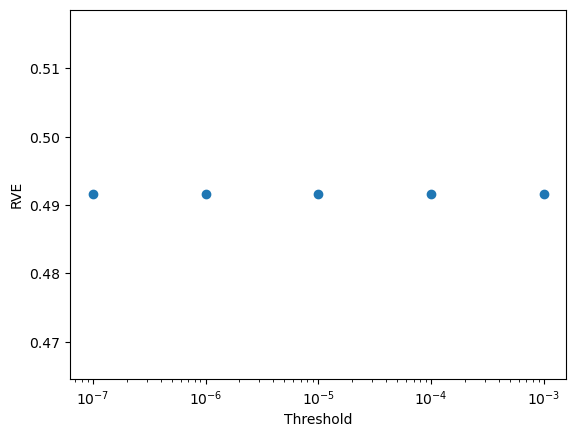

In [63]:
results_fsc.plot(x = 'Threshold', y = 'RVE', style = 'o')
plt.xlabel('Threshold')
plt.ylabel('RVE')
plt.legend('', frameon = False)
plt.xscale("log")
plt.show()

No feture selection for this data set

#### 3.1 Identify the most important features for the binary data and evaluate results

In [56]:
results_fsb = []
rfr = RandomForestRegressor(random_state = 4)
t_range = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001]
for t in t_range:
    sel = SelectFromModel(estimator = rfr, threshold = t)
    sel.fit(binary_train, y_train)
    binary_train_fs = sel.transform(binary_train)
    binary_test_fs = sel.transform(binary_test)
    rfr.fit(binary_train_fs, y_train)
    rfr_preds = rfr.predict(binary_test_fs)
    results_fsb.append({'Threshold': t, 'RVE': explained_variance_score(y_test, rfr_preds)})

# Create a DataFrame from the list of results
results_fsb = pd.DataFrame(results_fsb)
results_fsb = results_fsb.sort_values(by = "RVE", ascending = False)
results_fsb[:5]

,Threshold,RVE
3,1.000000e-04,0.642460
0,1.000000e-07,0.641089
1,1.000000e-06,0.641089
2,1.000000e-05,0.640711
4,1.000000e-03,0.615286


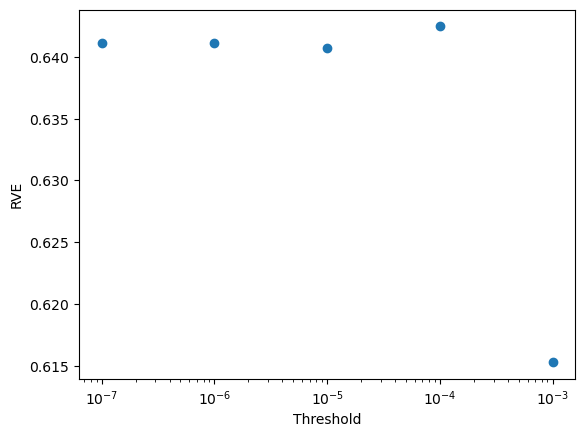

In [64]:
results_fsb.plot(x = 'Threshold', y = 'RVE', style = 'o')
plt.xlabel('Threshold')
plt.ylabel('RVE')
plt.legend('', frameon = False)
plt.xscale("log")
plt.show()

#### 3.2 Selected features - transforming binary data by keeping the "best" set of features

In [65]:
rfr = RandomForestRegressor(random_state = 4)
N,M = binary_train.shape
sel = SelectFromModel(estimator = rfr, threshold = 0.0001)
sel.fit(binary_train, y_train)
features = sel.get_support()
Features_selected = np.arange(M)[features]
binary_train_fs = sel.transform(binary_train)
binary_test_fs = sel.transform(binary_test)

In [66]:
print("Number of features selected: ", len (Features_selected), "out of the initial", M, "(%4.1f"%(((len (Features_selected))/M)*100),"%)")

Number of features selected:  1570 out of the initial 2089 (75.2 %)


### Step 5. Fitting and tuning the models

#### 5.1 Testing models and hyperparameters for continuous data

In [67]:
linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
decision_tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svm_regressor = SVR()
random_forest = RandomForestRegressor()
abr = AdaBoostRegressor()
gradient_boosting = GradientBoostingRegressor()
xgboost_regressor = XGBRegressor()
nnr = MLPRegressor()

# Define hyperparameter grids
param_grid_linear_regression = {}
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}
param_grid_elastic_net = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 5, 10, 20]}
param_knn = {'n_neighbors': [1, 5, 10, 20], 'weights': ['uniform', 'distance']}
param_grid_svm = {'gamma': [1e-1, 1e-7, 'scale'], 'C': [1, 10, 100], 'epsilon': [0.001, 0.1, 0.3]}
param_grid_random_forest = {'n_estimators': [10, 100], 'max_depth': [None, 30]}
param_abr = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
param_grid_gradient_boosting = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
param_grid_xgboost = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, None]}
param_grid_nnr= {'hidden_layer_sizes': [(100, 100)], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.01, 0.1, 1], 'max_iter': [2000]}

results_cont = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Explained Variance', 'RVE on Test Set'])

# Create a list of models and their respective parameter grids
models = [
    (linear_regression, param_grid_linear_regression),
    (ridge, param_grid_ridge),
    (lasso, param_grid_lasso),
    (elastic_net, param_grid_elastic_net),
    (decision_tree, param_grid_decision_tree),
    (knn, param_knn),
    (svm_regressor, param_grid_svm),
    (random_forest, param_grid_random_forest),
    (abr, param_abr),
    (gradient_boosting, param_grid_gradient_boosting),
    (xgboost_regressor, param_grid_xgboost),
    (nnr, param_grid_nnr)
]

# Iterate over models and perform GridSearchCV
for model, param_grid in models:
    print(f"Processing {model.__class__.__name__}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='explained_variance', n_jobs=-1)
    grid_search.fit(continuous_train_s, y_train)

    best_model = grid_search.best_estimator_
    
    # Use the best estimator for prediction
    preds = best_model.predict(continuous_test_s)
    
    # Calculate RVE on the test set
    rve = explained_variance_score(y_test, preds)
    
    # Append results to the DataFrame
    results_cont = pd.concat([results_cont, pd.DataFrame({
        'Model': [model.__class__.__name__],
        'Best Parameters': [str(grid_search.best_params_)],
        'Best Explained Variance': [grid_search.best_score_],
        'RVE on Test Set': [rve]
    })], ignore_index=True)


Processing LinearRegression...
Processing Ridge...
Processing Lasso...
Processing ElasticNet...
Processing DecisionTreeRegressor...
Processing KNeighborsRegressor...
Processing SVR...
Processing RandomForestRegressor...
Processing AdaBoostRegressor...
Processing GradientBoostingRegressor...
Processing XGBRegressor...
Processing MLPRegressor...


/Users/sonamoravcikova/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sonamoravcikova/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sonamoravcikova/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lb

#### 5.2 Testing models and hyperparameters for binary data

In [69]:
linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
decision_tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svm_regressor = SVR()
random_forest = RandomForestRegressor()
abr = AdaBoostRegressor()
gradient_boosting = GradientBoostingRegressor()
xgboost_regressor = XGBRegressor()
nnr = MLPRegressor()

# Define hyperparameter grids
param_grid_linear_regression = {}
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}
param_grid_elastic_net = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 5, 10, 20]}
param_knn = {'n_neighbors': [1, 5, 10, 20], 'weights': ['uniform', 'distance']}
param_grid_svm = {'gamma': [1e-1, 1e-7, 'scale'], 'C': [1, 10, 100], 'epsilon': [0.001, 0.1, 0.3]}
param_grid_random_forest = {'n_estimators': [10, 100], 'max_depth': [None, 30]}
param_abr = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
param_grid_gradient_boosting = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
param_grid_xgboost = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, None]}
param_grid_nnr= {'hidden_layer_sizes': [(100, 100)], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.01, 0.1, 1], 'max_iter': [2000]}

results_bin = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Explained Variance', 'RVE on Test Set'])

# Create a list of models and their respective parameter grids
models = [
    (linear_regression, param_grid_linear_regression),
    (ridge, param_grid_ridge),
    (lasso, param_grid_lasso),
    (elastic_net, param_grid_elastic_net),
    (decision_tree, param_grid_decision_tree),
    (knn, param_knn),
    (svm_regressor, param_grid_svm),
    (random_forest, param_grid_random_forest),
    (abr, param_abr),
    (gradient_boosting, param_grid_gradient_boosting),
    (xgboost_regressor, param_grid_xgboost),
    (nnr, param_grid_nnr)
]

# Iterate over models and perform GridSearchCV
for model, param_grid in models:
    print(f"Processing {model.__class__.__name__}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='explained_variance', n_jobs=-1)
    grid_search.fit(binary_train_fs, y_train)

    best_model = grid_search.best_estimator_
    
    # Use the best estimator for prediction
    preds = best_model.predict(binary_test_fs)
    
    # Calculate RVE on the test set
    rve = explained_variance_score(y_test, preds)
    
    # Append results to the DataFrame
    results_bin = pd.concat([results_bin, pd.DataFrame({
        'Model': [model.__class__.__name__],
        'Best Parameters': [str(grid_search.best_params_)],
        'Best Explained Variance': [grid_search.best_score_],
        'RVE on Test Set': [rve]
    })], ignore_index=True)


Processing LinearRegression...
Processing Ridge...
Processing Lasso...
Processing ElasticNet...
Processing DecisionTreeRegressor...


/Users/sonamoravcikova/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Processing KNeighborsRegressor...
Processing SVR...
Processing RandomForestRegressor...
Processing AdaBoostRegressor...
Processing GradientBoostingRegressor...
Processing XGBRegressor...
Processing MLPRegressor...


/Users/sonamoravcikova/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


### Step 6. Assessing the quality of the models

#### 6.1 Continuous data

In [68]:
pd.set_option('display.max_colwidth', None)
# Sort the DataFrame based on RVE in descending order
results_cont = results_cont.sort_values(by='RVE on Test Set', ascending=False)
results_cont

,Model,Best Parameters,Best Explained Variance,RVE on Test Set
7,RandomForestRegressor,"{'max_depth': None, 'n_estimators': 100}",0.440361,0.489888
10,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}",0.423528,0.487076
9,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}",0.382853,0.432875
5,KNeighborsRegressor,"{'n_neighbors': 10, 'weights': 'distance'}",0.254983,0.339450
4,DecisionTreeRegressor,"{'max_depth': 10, 'min_samples_leaf': 20}",0.176586,0.176827
0,LinearRegression,{},0.143091,0.156754
8,AdaBoostRegressor,"{'learning_rate': 0.1, 'n_estimators': 100}",0.122294,0.144169
6,SVR,"{'C': 100, 'epsilon': 0.1, 'gamma': 'scale'}",0.123453,0.136910
11,MLPRegressor,"{'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'max_iter': 2000, 'solver': 'lbfgs'}",0.150585,0.082858
1,Ridge,{'alpha': 0.1},0.027589,0.034678


#### 6.1 Binary data

In [70]:
pd.set_option('display.max_colwidth', None)
# Sort the DataFrame based on RVE in descending order
results_bin = results_bin.sort_values(by='RVE on Test Set', ascending=False)
results_bin

,Model,Best Parameters,Best Explained Variance,RVE on Test Set
6,SVR,"{'C': 1, 'epsilon': 0.001, 'gamma': 'scale'}",0.643491,0.682323
7,RandomForestRegressor,"{'max_depth': None, 'n_estimators': 100}",0.607392,0.642450
10,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}",0.610118,0.640389
11,MLPRegressor,"{'alpha': 1, 'hidden_layer_sizes': (100, 100), 'max_iter': 2000, 'solver': 'lbfgs'}",0.602432,0.626300
5,KNeighborsRegressor,"{'n_neighbors': 5, 'weights': 'distance'}",0.596528,0.623032
9,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}",0.555084,0.569976
1,Ridge,{'alpha': 10.0},0.517687,0.555008
0,LinearRegression,{},0.390650,0.479761
4,DecisionTreeRegressor,"{'max_depth': 20, 'min_samples_leaf': 5}",0.402028,0.459125
8,AdaBoostRegressor,"{'learning_rate': 0.1, 'n_estimators': 50}",0.209235,0.202871


### Step 7. Select best models of approach 2

#### 7.1 Selecting the best models, fiting and predicting - stack predicitons

In [93]:
# Train models on separate features
regressor = RandomForestRegressor(max_depth = None, n_estimators = 100)
classifier = SVR(C = 1 , epsilon = 0.001 , gamma = 'scale')

regressor.fit(continuous_train_s, y_train)
classifier.fit(binary_train_fs, y_train)

# Make predictions on the test set
regressor_preds = regressor.predict(continuous_test_s)
classifier_preds = classifier.predict(binary_test_fs)

# Combine predictions for stacking
stacking_input = np.column_stack((regressor_preds, classifier_preds))

#### 7.2 Find the best stacking model 

In [96]:
linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
decision_tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svm_regressor = SVR()
random_forest = RandomForestRegressor()
abr = AdaBoostRegressor()
gradient_boosting = GradientBoostingRegressor()
xgboost_regressor = XGBRegressor()
nnr = MLPRegressor()

# Define hyperparameter grids
param_grid_linear_regression = {}
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}
param_grid_elastic_net = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 5, 10, 20]}
param_knn = {'n_neighbors': [1, 5, 10, 20], 'weights': ['uniform', 'distance']}
param_grid_svm = {'gamma': [1e-1, 1e-7, 'scale'], 'C': [1, 10, 100], 'epsilon': [0.001, 0.1, 0.3]}
param_grid_random_forest = {'n_estimators': [10, 100], 'max_depth': [None, 30]}
param_abr = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
param_grid_gradient_boosting = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
param_grid_xgboost = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, None]}
param_grid_nnr= {'hidden_layer_sizes': [(50, 50), (100, 100)], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.01, 0.1, 1], 'max_iter': [5000]}

results_final = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Explained Variance', 'RVE on Test Set'])

# Create a list of models and their respective parameter grids
final_estimators = [
    (linear_regression, param_grid_linear_regression),
    (ridge, param_grid_ridge),
    (lasso, param_grid_lasso),
    (elastic_net, param_grid_elastic_net),
    (decision_tree, param_grid_decision_tree),
    (knn, param_knn),
    (svm_regressor, param_grid_svm),
    (random_forest, param_grid_random_forest),
    (abr, param_abr),
    (gradient_boosting, param_grid_gradient_boosting),
    (xgboost_regressor, param_grid_xgboost),
    (nnr, param_grid_nnr)
]

# Create and evaluate stacking models with different final estimators
for final_estimator_name, param_grid_final_estimator in final_estimators:
    # Perform GridSearchCV to find the best hyperparameters for the final estimator
    grid_search_final_estimator = GridSearchCV(
        estimator=final_estimator_name,
        param_grid=param_grid_final_estimator,
        cv=5,
        scoring='explained_variance',
        n_jobs=-1
    )
    
    grid_search_final_estimator.fit(stacking_input, y_test)
    best_final_estimator = grid_search_final_estimator.best_estimator_

    # Train the final model on stacking_input and y_test
    final_model = StackingRegressor(
        estimators=[('regressor', regressor), ('classifier', classifier)],
        final_estimator=best_final_estimator
    )

    final_model.fit(stacking_input, y_test)

    # Make predictions using the final model
    final_preds = final_model.predict(stacking_input)

    # Calculate RVE for the final predictions
    final_rve = explained_variance_score(y_test, final_preds)

    # Append results to the DataFrame
    results_final = pd.concat([results_final, pd.DataFrame({
        'Model': [final_estimator_name.__class__.__name__],
        'Best Parameters': [str(grid_search_final_estimator.best_params_)],
        'Best Explained Variance': [grid_search_final_estimator.best_score_],
        'RVE on Test Set': [final_rve]
    })], ignore_index=True)

In [97]:
pd.set_option('display.max_colwidth', None)
# Sort the DataFrame based on RVE in descending order
results_final = results_final.sort_values(by='RVE on Test Set', ascending=False)
results_final

,Model,Best Parameters,Best Explained Variance,RVE on Test Set
11,MLPRegressor,"{'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'max_iter': 5000, 'solver': 'adam'}",6.956643e-01,0.811349
1,Ridge,{'alpha': 0.1},6.919251e-01,0.747347
0,LinearRegression,{},6.919195e-01,0.746903
5,KNeighborsRegressor,"{'n_neighbors': 20, 'weights': 'uniform'}",6.881447e-01,0.740515
10,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}",6.865292e-01,0.726408
9,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",6.892403e-01,0.725820
8,AdaBoostRegressor,"{'learning_rate': 0.01, 'n_estimators': 100}",6.864321e-01,0.715251
6,SVR,"{'C': 100, 'epsilon': 0.1, 'gamma': 0.1}",6.958026e-01,0.710245
4,DecisionTreeRegressor,"{'max_depth': None, 'min_samples_leaf': 20}",6.695568e-01,0.686815
7,RandomForestRegressor,"{'max_depth': None, 'n_estimators': 100}",6.391257e-01,0.648038


#### 7.3 Compare results from approach 1 and approach 2

In [98]:
combined_results['Approach'] = '1'
results_final['Approach'] = '2'

# Combine the two DataFrames
results = pd.concat([combined_results, results_final])

# Sort the combined DataFrame based on RVE in descending order
results = results.sort_values(by='RVE on Test Set', ascending=False)

results[:10]

,Model,Best Parameters,Best Explained Variance,RVE on Test Set,Dataset,Approach
11,MLPRegressor,"{'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'max_iter': 5000, 'solver': 'adam'}",0.695664,0.811349,NaN,2
1,Ridge,{'alpha': 0.1},0.691925,0.747347,NaN,2
0,LinearRegression,{},0.691920,0.746903,NaN,2
5,KNeighborsRegressor,"{'n_neighbors': 20, 'weights': 'uniform'}",0.688145,0.740515,NaN,2
10,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}",0.686529,0.726408,NaN,2
9,GradientBoostingRegressor,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",0.689240,0.725820,NaN,2
8,AdaBoostRegressor,"{'learning_rate': 0.01, 'n_estimators': 100}",0.686432,0.715251,NaN,2
6,SVR,"{'C': 100, 'epsilon': 0.1, 'gamma': 0.1}",0.695803,0.710245,NaN,2
4,DecisionTreeRegressor,"{'max_depth': None, 'min_samples_leaf': 20}",0.669557,0.686815,NaN,2
6,SVR,"{'C': 1, 'epsilon': 0.001, 'gamma': 'scale'}",0.644669,0.681507,Without PCA,1


#### 7.4 Apply the best model

In [99]:
# Final model
final_model = StackingRegressor(
    estimators=[('regressor', regressor), ('classifier', classifier)],
    final_estimator=MLPRegressor(alpha = 0.01, hidden_layer_sizes = (50, 50), max_iter = 5000, solver= 'adam')
)

# Train the final model on stacking_input and y_test
final_model.fit(stacking_input, y_test)

StackingRegressor(estimators=[('regressor', RandomForestRegressor()),
                              ('classifier', SVR(C=1, epsilon=0.001))],
                  final_estimator=MLPRegressor(alpha=0.01,
                                               hidden_layer_sizes=(50, 50),
                                               max_iter=5000))

### Step 8. Produce best estimators for y_ivs

In [100]:
# Apply the same transformation to X_ivs
continuous_ivs = X_ivs[:, :43]
binary_ivs = X_ivs[:, 43:]

continuous_ivs_s  = pd.DataFrame(scaler.transform(continuous_ivs))
binary_ivs_fs = sel.transform(binary_ivs)

# Make predictions on the test set
regressor_preds_ivs = regressor.predict(continuous_ivs_s)
classifier_preds_ivs = classifier.predict(binary_ivs_fs)

# Combine predictions for stacking on x_ivs
stacking_input_ivs = np.column_stack((regressor_preds_ivs, classifier_preds_ivs))

# Make predictions using the final model on x_ivs
final_preds_ivs = final_model.predict(stacking_input_ivs)


np.savetxt('14.txt', final_preds_ivs, fmt='%.3f')
